In [1]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

pathy=pathMAC

import numpy as np
import pandas as pd
import os
sys.path.insert(0, pathy+'/Mods')
import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [72]:
Nsamp=12
modulation_theta=1.05
modulation_kappa=0.5
mode='T'
print("\n \n")
print("lattice sampling...") 

#Lattice parameters 
#lattices with different normalizations
theta=modulation_theta*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)
print(f"taking {umkl} umklapps")
VV=lq.boundary()
#kosh params realistic  -- this is the closest to the actual Band Struct used in the paper
# hbvf = 2.1354; # eV
# hvkd=hbvf*q
# kappa_p=0.0797/0.0975
# kappa=kappa_p
# up = 0.0975; # eV
# u = kappa*up; # eV
# alpha=up/hvkd
# alph=alpha
PH=True

#JY params 
hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
hvkd=hbvf*q
kappa=modulation_kappa
up = 0.105; # eV
u = kappa*up; # eV
alpha=up/hvkd
alph=alpha
#Andrei params 
# hbvf = 19.81/(8*np.pi/3); # eV
# hvkd=hbvf*q
# kappa=1
# up = 0.110; # eV
# u = kappa*up; # eV
# alpha=up/hvkd
# alph=alpha
print("\n \n")
print("parameters of the hamiltonian...")
print("hbvf is ..",hbvf )
print("q is...", q)
print("hvkd is...", hvkd)
print("kappa is..", kappa)
print("alpha is..", alph)
print("the twist angle is ..", theta)
print("\n \n")
#electron parameters
nbands=2
nremote_bands=0
hbarc=0.1973269804*1e-6 #ev*m
alpha=137.0359895 #fine structure constant
a_graphene=2.458*(1e-10) #in meters this is the lattice constant NOT the carbon-carbon distance
e_el=1.6021766*(10**(-19))  #in joule/ev
ee2=(hbarc/a_graphene)/alpha
eps_inv = 1/10
d_screening=20*(1e-9)/a_graphene
d_screening_norm=d_screening*lq.qnor()
epsilon_0 = 8.85*1e-12
ev_conv = e_el
Vcoul=( e_el*e_el*eps_inv*d_screening/(2*epsilon_0*a_graphene) )
V0= (  Vcoul/lq.Vol_WZ() )/ev_conv
print(V0, 'la energia de coulomb en ev')
print("\n \n")
#phonon parameters
c_light=299792458 #m/s
M=1.99264687992e-26 * (c_light*c_light/e_el) # [in units of eV]
mass=M/(c_light**2) # in ev *s^2/m^2
alpha_ep=0 # in ev
beta_ep=4 #in ev SHOULD ALWAYS BE GREATER THAN ZERO
if mode=="L":
    c_phonon=21400 #m/s
if mode=="T":
    c_phonon=13600 #m/s
else:
    c_phonon=21400 #m/s

#calculating effective coupling
A1mbz=lq.VolMBZ*((q**2)/(a_graphene**2))
AWZ_graphene=np.sqrt(3)*a_graphene*a_graphene/2
A1bz=(2*np.pi)**2 / AWZ_graphene
alpha_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*alpha_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
beta_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*beta_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
alpha_ep_effective_tilde=alpha_ep_effective/beta_ep_effective
beta_ep_effective_tilde=beta_ep_effective/beta_ep_effective

#testing the orders of magnitude for the dimensionless velocity squared
qq=q/a_graphene
Wupsilon=(beta_ep_effective**2)*qq*qq
W=0.008
#ctilde=W*(qq**2)*(mass)*(c_phonon**2)/Wupsilon
print("phonon params", Wupsilon )
print("phonon params upsilon", Wupsilon/W )
print("area ratio", A1mbz/A1bz, (2*np.sin(theta/2))**2   )
print("correct factor by which the interaction is reduced",np.sqrt(2)/(2*np.sin(theta/2)))
print("c tilde",np.sqrt((Wupsilon/W)*(1/(qq**2))*(1/mass) ))
print("\n \n")
    
#parameters to be passed to the Bubble class
mode_layer_symmetry="a" #whether we are looking at the symmetric or the antisymmetric mode
cons=[alpha_ep_effective_tilde,beta_ep_effective_tilde, Wupsilon, a_graphene, mass] #constants used in the bubble calculation and data anlysis

rf=1
gp2=(rf)**2
print(beta_ep*rf) #rescaling so that the coupling is given by
    


 

lattice sampling...
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.002398967742919922  s
size of q before symmetr... 144
size of q after symmetr... 157
size of q before symmetr... 144
size of q after symmetr... 157
144 1bz numer of sampling lattice points
157 X numer of sampling lattice points
1008 Q numer of sampling lattice points
the shape of the index q array (144, 157)
1 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (144, 1)
the shape of the index M array (157,)
the shape of the index -M array (157,)
no such point 0.016619572144165852 0.16312034567125916
the shape of the index Mrep array (157,)
no such point -0.03323914428833143 -0.17271566012250972
no such point -0.0166195721441656 -0.18231097457376022
no such point -0.022159429525554213 -0.1727156601225097
no such point 2.220446049250313e-16 -0.19190628902501072
no such point -0.005539857381388378 -0.18231097457376022
no such poin

## For $\kappa$= 0.7

In [73]:
kappa=0.75
path=pathy+'/data/2recoverytest_2023-03-17-18-06-33'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'mode_Mins_')
    for d in data:
        fullpath=fulpath+'/'+d
        print(fullpath)
    
        dff = pd.read_hdf(fullpath)
        frames.append(dff)

        

df=pd.concat(frames).sort_values(['theta', 'nu'])




['2recoverytest_1.05']
/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure/data/2recoverytest_2023-03-17-18-06-33/2recoverytest_1.05/data12_mode_Mins_symmetry_a_alpha_0.0_beta_1.0_umklp_0_kappa_0.75_theta_0.01832595714594046_modeHF_0_nu_0_T_0.0.h5


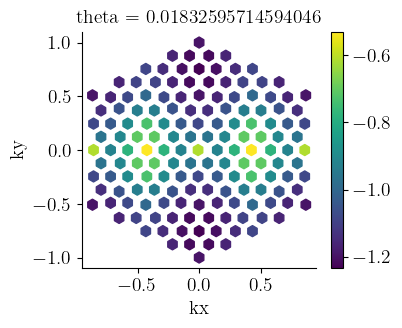

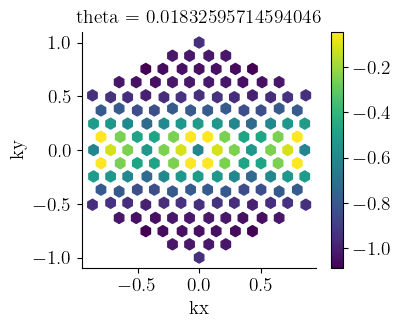

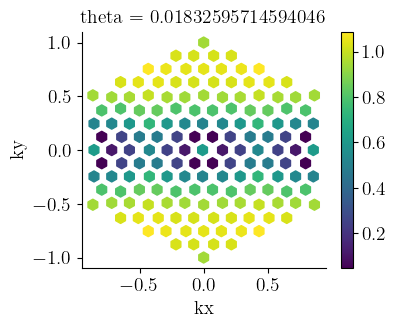

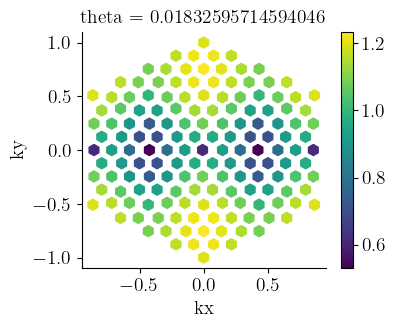

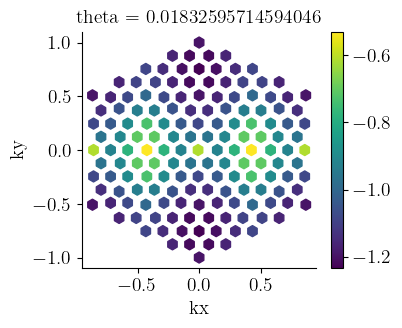

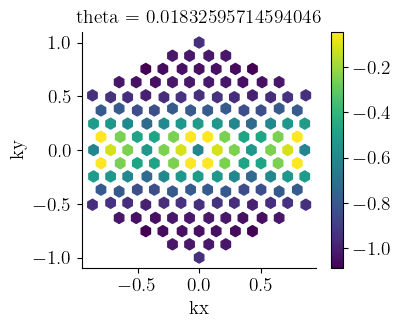

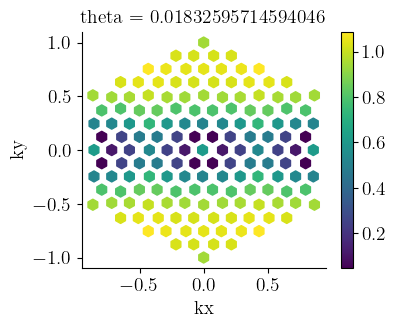

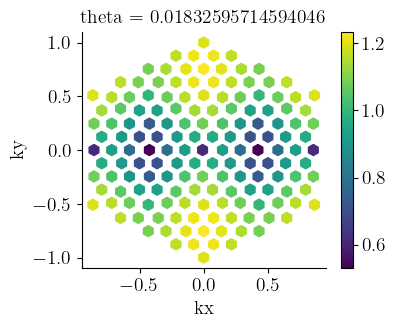

In [74]:

df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dp0', cbar=False, square = True)
# get figure background color



fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dp1', cbar=False, square = True)
# get figure background color


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dp2', cbar=False, square = True)
# get figure background color



fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dp3', cbar=False, square = True)
# get figure background color


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dm0', cbar=False, square = True)
# get figure background color



fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dm1', cbar=False, square = True)
# get figure background color


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dm2', cbar=False, square = True)
# get figure background color



fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dm3', cbar=False, square = True)
# get figure background color



[0.01832596]


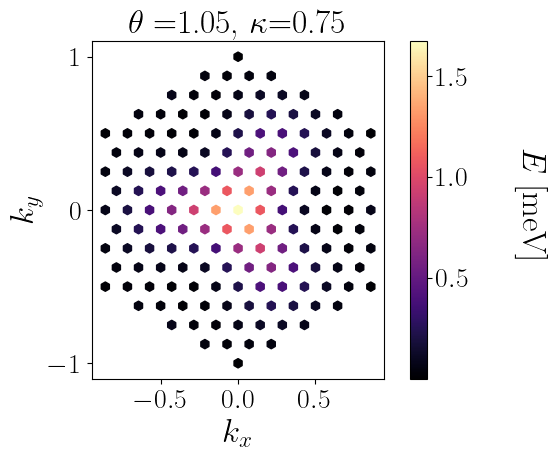

In [75]:
cTrans=13600

thetaarr=np.sort(np.array(df['theta'].unique()))
print(thetaarr)
indthet=0
indnumax=0

df_one_temp=df.loc[(df['nu'] == 0)&(df['theta'] == thetaarr[indthet])]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('magma')
    im=plt.scatter(d1,d2 ,c=d3*1000,s=45, cmap=color_map, marker='h')
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$k_y$', size=24)
    
    plt.xticks( size=20)
    plt.yticks( size=20)
    plt.text(1.8,-0.3,r'$E$ [meV]', size=24, rotation=270)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) +r', $\kappa$='+str(kappa), size=24)
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    
    
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


draw_heatmap( 'kx', 'ky', 'Ep2',data=df_one_temp)
plt.savefig('imgs/disp07.png', dpi=400)

[0.01832596]


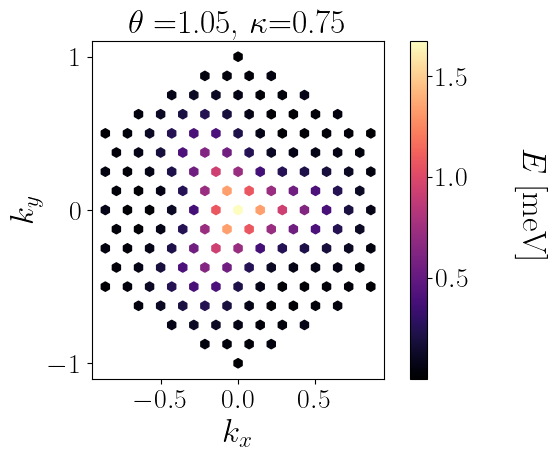

In [76]:
cTrans=13600

thetaarr=np.sort(np.array(df['theta'].unique()))
print(thetaarr)
indthet=0
indnumax=0

df_one_temp=df.loc[(df['nu'] == 0)&(df['theta'] == thetaarr[indthet])]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('magma')
    im=plt.scatter(d1,d2 ,c=d3*1000,s=45, cmap=color_map, marker='h')
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$k_y$', size=24)
    
    plt.xticks( size=20)
    plt.yticks( size=20)
    plt.text(1.8,-0.3,r'$E$ [meV]', size=24, rotation=270)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) +r', $\kappa$='+str(kappa), size=24)
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    
    
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


draw_heatmap( 'kx', 'ky', 'Em2',data=df_one_temp)
plt.savefig('imgs/disp07.png', dpi=400)

0.14433756729740632 0.24999999999999978


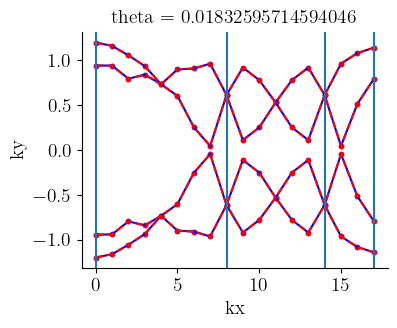

In [77]:
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    d5 = np.array(data.loc[:,args[4]])
    d6 = np.array(data.loc[:,args[5]])
    d7 = np.array(data.loc[:,args[2]])
    d8 = np.array(data.loc[:,args[3]])
    d9 = np.array(data.loc[:,args[4]])
    d10 = np.array(data.loc[:,args[5]])
    
    [path,kpath,HSP_index]=lq.embedded_High_symmetry_path(d1,d2)
    pth=np.arange(np.size(path))
    plt.plot(d3[path], c='b')
    plt.plot(d4[path], c='b')
    plt.scatter(pth,d3[path], c='b', s=9)
    plt.scatter(pth,d4[path], c='b', s=9)
    plt.plot(d5[path], c='b')
    plt.plot(d6[path], c='b')
    plt.scatter(pth,d5[path], c='b', s=9)
    plt.scatter(pth,d6[path], c='b', s=9)
    
    
    plt.plot(d7[path], ls='--', c='r')
    plt.plot(d8[path], ls='--', c='r')
    plt.scatter(pth,d7[path], c='r', s=9)
    plt.scatter(pth,d8[path], c='r', s=9)
    plt.plot(d9[path], ls='--', c='r')
    plt.plot(d10[path], ls='--', c='r')
    plt.scatter(pth,d9[path], c='r', s=9)
    plt.scatter(pth,d10[path], c='r', s=9)
    
    for ind in HSP_index:
        plt.axvline(ind)


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dm0', 'dm1','dm2','dm3', 'dp0', 'dp1','dp2', 'dp3', cbar=False, square = True)
# get figure background color

0.14433756729740632 0.24999999999999978


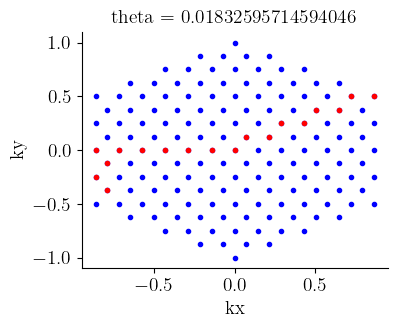

In [78]:
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    d5 = np.array(data.loc[:,args[4]])
    d6 = np.array(data.loc[:,args[5]])
    
    [path,kpath,HSP_index]=lq.embedded_High_symmetry_path(d1,d2)
    pth=np.arange(np.size(path))
    plt.scatter(d1,d2, c='b', s=9)
    plt.scatter(kpath[:,0],kpath[:,1], c='r', s=9)
    
    

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dm1','dm2','dp1','dp2', cbar=False, square = True)
# get figure background color